# Convergence theory

## Lax theory

Solution of a linear, time-dependent PDE by the method of lines can be expressed in the generic form

$$
\bfu_{n+1} = \bfB(\tau) \bfu_n + \bff_n(\tau), 
$$

where $\bfu_i$ is a vector of node values and $\tau$ is the time step size. (For multistep methods, the vector $\bfu$ has to be generalized to hold multiple past values, but the difference is in details, not in kind.) There are other historically significant solution methods, such as *Lax--Wendroff*, that can be expressed this way that are not really MOL discretizations, though we won't go into their details. 

For example, if the semidiscrete problem $\partial_t \bfu = \bfA \bfu$ is solved by the trapezoidal formula, we have 

$$
\bfu_{n+1} = \bfu_n + \tfrac{1}{2}\tau \bigl( \bfA\bfu_{n+1} + \bfA\bfu_n \bigr), 
$$

which implies that

$$
\bfB = \bigl( \bfI - \tfrac{1}{2}\tau \bfA \bigr)^{-1} \, \bigl( \bfI + \tfrac{1}{2}\tau \bfA \bigr). 
$$

An implicit aspect of the framework that follows is that the spatial discretization size/step size is prescribed as a function of $\tau$ as $\tau\to 0$. In the MOL, we might find such a relation suggested by the requirements of absolute stability, for example.

As before, we require **consistency**, which means that inserting the exact solution into the formula has a truncation error that vanishes as $\tau\to 0$, and stability, which means boundedness of the numerical solution as $\tau \to 0$.

::::{prf:definition} Lax--Richtmyer stability
For any $T$, there is a constant $C_T$ such that

$$
\norm{\bfB(\tau)^n} \le C_T
$$

whenever $nk \le T$.
::::

Here is the most famous theoretical result for the solution of time-dependent PDEs.

::::{prf:theorem} Lax Equivalence
A consistent linear method of the form above is convergent if and only if it is Lax--Richtmyer stable.
::::

The reasoning is much the same as for the TPBVP case: given stability, the global error is a bounded multiple of the accumulated truncation errors. 

::::{attention}
There is a major difference between the stability theory for ODE IVPs and for time-dependent PDEs: the ODE case can be concluded for a wide variety of problems (typically, those that satisfy a Lipschitz continuity condition), while the PDE theory is limited to linear problems. The Lax PDE theory is much more like the theory of absolute stability for ODEs, which is also restricted to linear problems.
::::

::::{prf:example}
If we semidiscretize the diffusion equation with periodic conditions on $[0,1]$ using 2nd-order centered differences in space, then the matrix $\bfA$ has eigenvalues 

$$
\lambda_k = \frac{2}{h^2} \left( \cos(k\pi h) - 1 \right), \quad k=0,\ldots,n-1.
$$

Using the forward Euler method in time, the eigenvalues of $\bfB = \bfI + \tau \bfA$ are therefore

$$
1 + \frac{2 \tau}{h^2} \left( \cos(k\pi h) - 1 \right), \quad k=0,\ldots,n-1. 
$$

Since $h=1/n$, these are found to lie within the real interval 

$$
\left[ 1 - \frac{4 \tau}{h^2}, 1 \right]. 
$$

Since $\bfB$ is a normal matrix, its 2-norm equals its spectral radius. Hence we can ensure that $\norm{\bfB}\le 1$ if 

$$
1 - \frac{4 \tau}{h^2} \ge -1, 
$$

i.e.,

$$
\frac{\tau}{h^2} \le \frac{1}{2}.
$$ 

In that case, convergence is assured. 
::::

The general case of bounds on powers of a family of matrices is covered by the *Kreiss Matrix Theorem*, which we will not explore. We just note here that while 

$$
\norm{\bfB(\tau)} \le 1
$$

in some matrix norm is sufficient for the power-boundedness required for stability, it is not necessary. 

## von Neumann analysis

A useful alternative to both MOL absolute stability and the Lax theory is the use of Fourier analysis, which goes under the name of **von Neumann analysis** in this context. The classical setting is to ignore boundaries and suppose that we have data on the entire grid $h\mathbb{Z}$, although one could also use periodic end conditions, which discretizes the wavenumber.

The Fourier modes on the unbounded equispaced grid are the functions 

$$
u_\xi(x) = e^{i\xi x}, \quad \xi \in \Bigl[ -\frac{\pi}{h}, \frac{\pi}{h} \Bigr).
$$

It's easiest to begin with an example. 

::::{prf:example}
<!-- Again consider the diffusion equation with discretization provided by 2nd-order centered differences in space and forward Euler in time. If $\bfu$ is the discretization of $u_\xi$, then 

$$
\bfu_{n+1} = \left[ 1 + \frac{2\tau}{h^2} \bigl( \cos(\xi h) - 1 \bigr) \right] \bfu_n. 
$$ -->

Again consider the diffusion equation with spatial discretization provided by 2nd-order centered differences. If $\bfu$ is the discretization of $u_\xi$, then we can identify 

$$
\bfA \bfu = \frac{2}{h^2} \bigl( \cos(\xi h) - 1 \bigr) \bfu 
$$

(provided we think in terms of infinite vectors and matrices without worrying too much about them). If we choose forward Euler in time, we can define the **amplification factor**

$$
g(\xi) = 1 + \frac{2\tau}{h^2} \bigl[ \cos(\xi h) - 1 \bigr],
$$

which converts $\bfB(\tau)\bfu$ to $g(\xi)\bfu$. It's clear that 

$$
1 - \frac{4 \tau}{h^2} \le g(\xi) \le 1,
$$

and so we can conclude stability provided that the lower bound is at least $-1$, as we did above.
::::

The example above is pretty much the same as for the Lax theory above, except that the wavenumber is not discretized. It's also easy to extend to other time-stepping methods.

::::{prf:example}
If we were to use a trapezoidal formula in time, then

$$
g(\xi) = \frac{1 + \tfrac{\tau}{h^2} \bigl[ \cos(\xi h) - 1 \bigr]}{\frac{1 - \tfrac{\tau}{h^2} \bigl[ \cos(\xi h) - 1 \bigr]}. 
$$

This has the form $(1+z)/(1-z)$, and the condition $|g|\le 1$ is equivalent to saying that $z$ is at least as close to $-1$ in the complex plane as to $1$. Since $z$ clearly lies on the negative real axis or at the origin, this condition is assured with no restrictions on $\tau$. I.e., this method is *unconditionally stable*. 
::::

While the conclusions we get here are nothing new compared to either the Lax theory or MOL absolute stability, there is additional information about exactly how instability will look. In the Euler case, the amplification $|g(\xi)|$ is largest when $\xi h = \pm \pi$. This represents the sawtooth mode in space. Since every initial condition (and numerical error) is a superposition of Fourier modes, we expect the largest possible exponential growth in the most oscillatory spatial mode.

For example, here is a well-resolved, smooth initial condition.

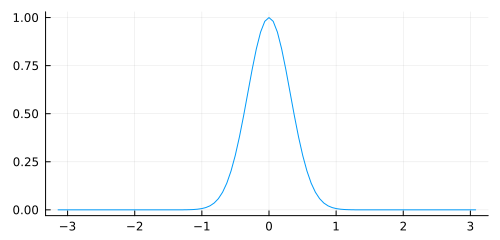

In [1]:
include("diffmats.jl")
n = 100
h = 2π/n

x = [i*h-π for i in 0:n-1]
u = @. exp(-5x^2)

using Plots,PyFormattedStrings
default(label="",size=(500,240))
plot(x,u)

Technically the initial condition isn't periodic, but the endpoint values are so small that numerically we can treat it as such. (As a rule, interior behavior will always be governed by the von Neumann implications, while boundaries can only introduce additional complications.)

In [2]:
Dxx = 1/h^2*diagm(1-n=>[1.0],-1=>ones(n-1),0=>fill(-2.0,n),1=>ones(n-1),n-1=>[1.0])
τ = 0.6h^2 

anim = @animate for i in 1:0.3/τ
    global u += τ*(Dxx*u) 
    plot(x,u,ylims=[-0.5,1.5],label=f"t={i*τ:.3f}")
end

mp4(anim,"eulerheat.mp4")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/Dropbox/class/817/notes/mol/eulerheat.mp4
└ @ Plots /Users/driscoll/.julia/packages/Plots/4UTBj/src/animation.jl:154


Plots.AnimatedGif("/Users/driscoll/Dropbox/class/817/notes/mol/eulerheat.mp4")

Note above how everything seems to be proceeding well for a while. However, there is some roundoff noise introduced with significant components at all wavenumbers, and exponential growth always makes itself known in the end.